<a href="https://colab.research.google.com/github/Yomunozs/Aprendizaje_Maquina/blob/main/Ejercicios_propuestos_en_clase/Ejercicio_30_08_2024_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib
import os
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

FILEID = "1tpM_jWdNkOW3-1bpfHvbN4ZKfSkd8J4b"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O OIF.jfif && rm -rf /tmp/cookies.txt


--2024-09-12 19:39:08--  https://docs.google.com/uc?export=download&confirm=&id=1tpM_jWdNkOW3-1bpfHvbN4ZKfSkd8J4b
Resolving docs.google.com (docs.google.com)... 172.253.122.113, 172.253.122.102, 172.253.122.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.122.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1tpM_jWdNkOW3-1bpfHvbN4ZKfSkd8J4b&export=download [following]
--2024-09-12 19:39:08--  https://drive.usercontent.google.com/download?id=1tpM_jWdNkOW3-1bpfHvbN4ZKfSkd8J4b&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.usercontent.google.com/downlo

(168, 300, 3)

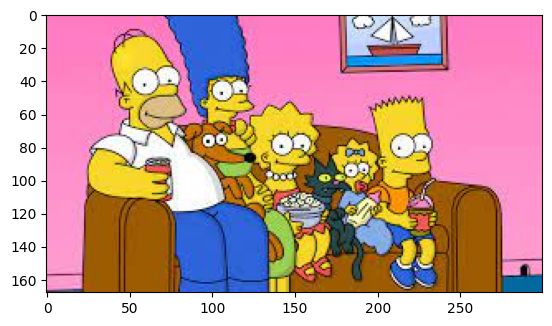

In [ ]:
from matplotlib.image import imread
image = imread(os.path.join("ls.jpg")) #Se debe acargar manualmente la imagen
plt.imshow(image)
image.shape

In [ ]:
# Version de codigo para obtener la matriz de 5 filas con indices
# m = np.zeros((3,180 ,286) )
# for axis in range(image.ndim):
#   c = 0
#   for j in range(image.shape[1]):
#     for i in range(image.shape[0]):
#       m[axis, i, :] += c
#       c+=1
# m = np.zeros((3, image.shape[0], image.shape[1]))
# for dim in range(3):
#   for col in range(image.shape[1]):
#     m[dim, :, col] = np.arange(image.shape[0])
# print(m)
# print(m.shape)
# M =m.reshape(-1, 3)
# print(M.shape)
# print(m.shape)
# b = M[:,0].reshape(-1, 1)
# print(b.shape)
# b

In [ ]:
X = image.reshape(-1, 3) # Aplanar imagen en una dimension
print(X.shape)
print(image.shape)

(50400, 3)
(168, 300, 3)


In [ ]:
# # Codigo para agregar una columna a X

# import numpy as np
# # Agregar una columna de unos a X
# unos = m[0].reshape(-1,1)
# X_con_unos = np.hstack((X_con_unos, unos))

# print(X_con_unos.shape)
# print(X_con_unos)
# X = X_con_unos

In [ ]:
# # Codigo para eliminar una columna de la matriz X

# # Suponiendo que quieres eliminar la última columna
# X = X[:, :-1]
# print(X.shape)
# print(X)


In [ ]:
# Codigo optimizado (Copiado) para obtener la matriz de 5 filas con etiquetas
r = image.shape[0] # Filas
c = image.shape[1] # Columnas


vr = np.linspace(0,r,r,endpoint=False) #Vector para filas
vc = np.linspace(0,c,c,endpoint = False)# Vector para columnas
Xc = np.kron(np.ones((r,1)),vc.reshape(-1,1)) # Se utiliza producto kronecker para obtener una matriz
Xr = np.kron(vr.reshape(-1,1),np.ones((1,c)))# Se utiliza producto kronecker para obtener una matriz
Xc = Xc.reshape(-1)# Se reescribe como una fila
Xr = Xr.reshape(-1) # Se reescribe como una fila
X = np.c_[X,Xc,Xr] # se concatena la matriz de la imagen con las dos filas creadas anteriormente

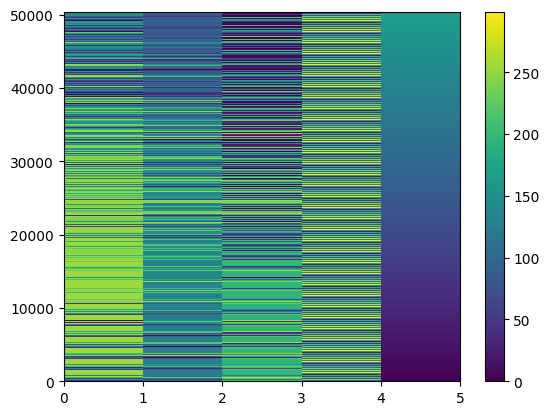

In [ ]:
# Grafica para ilustrar la configuracion de la matriz
plt.pcolormesh(X)
plt.colorbar()

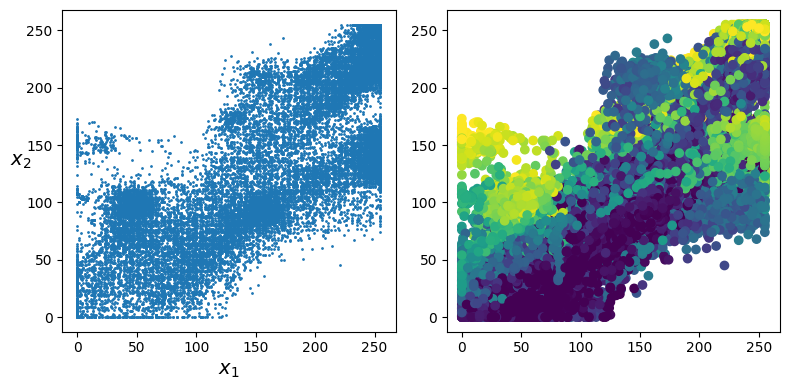

In [ ]:
# Funcion para graficar la dipersion de los datos segun el color
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plot_clusters(X)
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2])
#save_fig("blobs_plot")
plt.tight_layout()
plt.show()

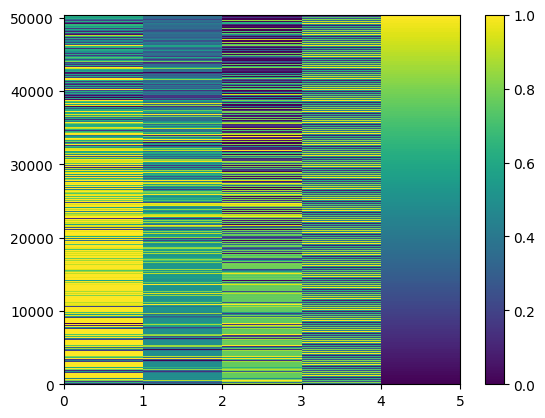

In [ ]:
# Se normaliza la matriz para que todos los valores tengan la misma importancia al entrenar kmins
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_m = minmax.fit_transform(X)
plt.pcolormesh(X_m) #La grafica muestra que  el rano queda entre 0 y 1
plt.colorbar()

In [ ]:
# Se utiliza kmeans para hallar los clusters
from sklearn.cluster import KMeans
k = 4 # Numero de agrupaciones, cada custer debe obtener un color diferente
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
y_pred = kmeans.fit_predict(X_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#Se muestran los cluster obtenidos por kmeans
c = kmeans.transform(X_m)
c

array([[0.51719995, 1.19956293, 0.8302395 , 1.08589788],
       [0.51597906, 1.19811857, 0.82718032, 1.08454466],
       [0.514777  , 1.19668182, 0.82412336, 1.08320008],
       ...,
       [1.39843724, 0.93824367, 1.21071588, 0.7304748 ],
       [1.40036051, 0.93993739, 1.21136568, 0.73300789],
       [1.40228911, 0.94163994, 1.21202437, 0.73554747]])

In [ ]:
# Se calcula la distancia euclidiana entre cada punto en X y los centroides de los clusters.
from scipy.spatial import distance
z = distance.cdist(X, c, metric='euclidean', out=None)

In [ ]:
#Se encuenran los indices de los colores mas cercanos , parecidos a los clusters
s = np.argmin(c, axis=0)

In [ ]:
# Se busca en la matriz sin escalar los colores mas representativos
a = X[s,:3]
a

array([[235., 181., 153.],
       [141.,  83.,  20.],
       [245., 151., 188.],
       [ 49.,  90., 195.]])

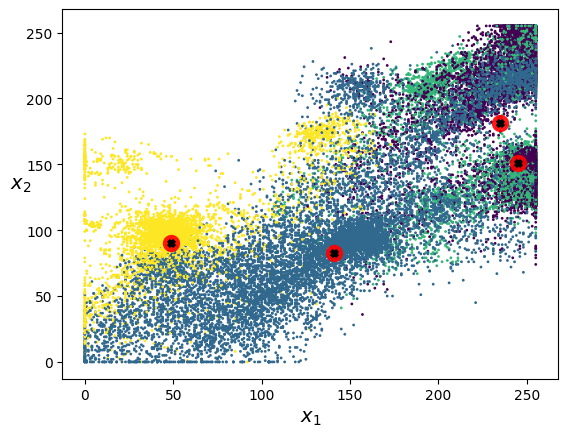

In [ ]:
#Se plotean los cluster predichos
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=20, linewidths=3,
                color=cross_color, zorder=11, alpha=1)

plot_centroids(a, weights=None, circle_color='r', cross_color='k')
plot_clusters(X, y_pred)

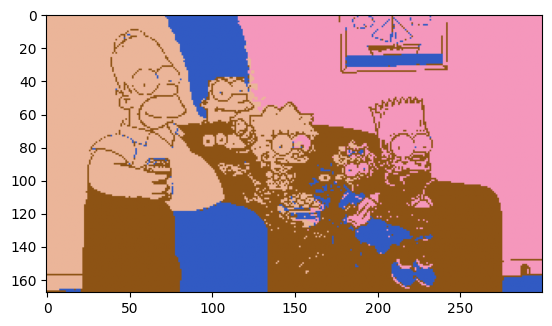

In [ ]:
#A partir de los coores representativos generados por kmeans se regenera a imagen

segmented_img = a[kmeans.labels_]# Se asigna a cada píxel de la imagen su color correspondiente según la etiqueta del cluster asignado por KMeans
segmented_img = segmented_img.reshape(image.shape)# Se redimensiona la imagen segmentada para que tenga la misma forma que la imagen original
plt.imshow(segmented_img / 255)# Se muestra la imagen segmentada, dividiendo por 255 para normalizar los valores de color en el rango [0, 1]


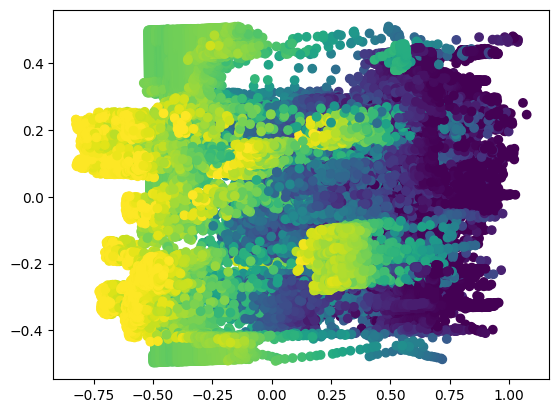

In [ ]:
#Se repite el proceso utilizando PCA
from sklearn.decomposition import PCA
scaler = MinMaxScaler()

X_ = scaler.fit_transform(X)
X_ = PCA(n_components=2).fit_transform(X_)
plt.scatter(X_[:,0], X_[:,1], c=X[:,2])
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4,n_init='auto').fit(X_)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

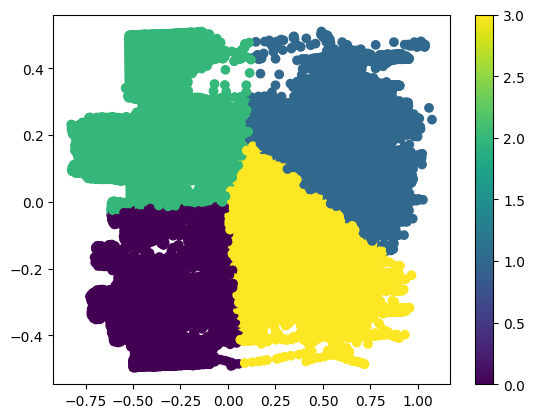

In [ ]:
plt.scatter(X_[:,0], X_[:,1], c=kmeans.labels_)

plt.colorbar()
plt.show()


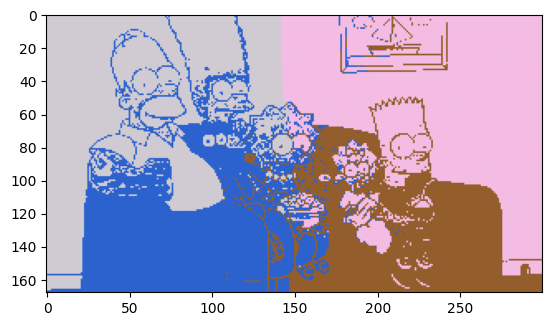

In [ ]:
D_ = kmeans.transform(X_)
D_.shape
ind_ = np.argmin(D_,axis=0)
centroids_ = X[ind_,:3]
centroids_


segmented_img = centroids_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img/255.)

plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


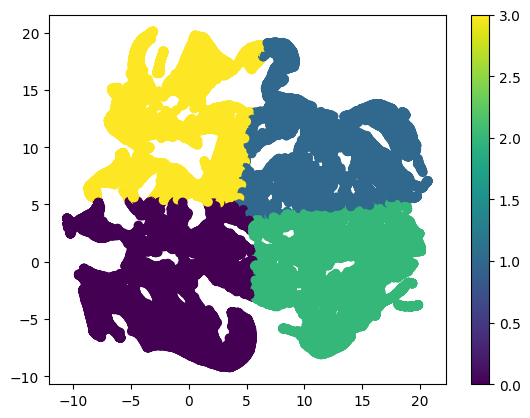

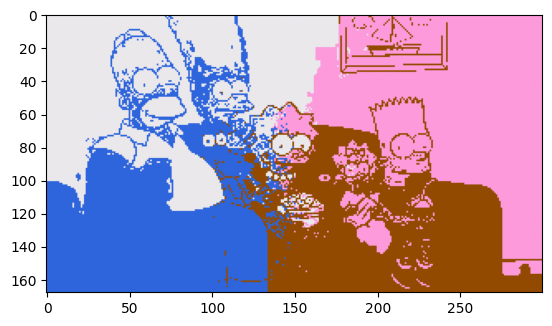

In [ ]:
# Para UMAP
!pip install umap-learn
import umap

reducer = umap.UMAP()
X_umap = reducer.fit_transform(X_)

kmeans = KMeans(n_clusters=4,n_init='auto').fit(X_umap)

plt.scatter(X_umap[:,0], X_umap[:,1], c=kmeans.labels_)

plt.colorbar()
plt.show()

D_umap = kmeans.transform(X_umap)
D_umap.shape
ind_umap = np.argmin(D_umap,axis=0)
centroids_umap = X[ind_umap,:3]
centroids_umap


segmented_img = centroids_umap[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img/255.)

plt.show()
